## Integration of Macrophage cells identified from total blastema and sorted senescent cells during limb regeneration

In [1]:
setwd("/Users/giovanni/Desktop/GIOVA/Bioinformatics/wANDY/Paper/Notebooks/Seurat")

library(Seurat)
library(sctransform)
library(dplyr)
library(tidyverse)
library(readxl)
library(stringr)
library(viridis)


Warning message:
"package 'Seurat' was built under R version 4.0.4"
Attaching SeuratObject

Warning message:
"package 'dplyr' was built under R version 4.0.4"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyverse' was built under R version 4.0.5"
Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.1     v stringr 1.4.0
v tidyr   1.1.3     v forcats 0.5.1
v readr   1.4.0     

Warning message:
"package 'tidyr' was built under R version 4.0.4"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'readxl

In [6]:
## load Blastema sorted Macrophage data
MacroAxo <- readRDS(file = "Macrophage_Blastema_Seurat.rds")
## Dataset will be used to distinguish the cells
MacroAxo@meta.data[,"dataset"] = "Macrophage"
MacroAxo@meta.data[,"cellType"] = "Blastema"
table(MacroAxo@meta.data$orig.ident)


Blastema     Limb 
     380        0 

In [19]:
MacroAxo

An object of class Seurat 
121179 features across 380 samples within 2 assays 
Active assay: SCT (21961 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [17]:
## load sorted Senescent data
SenAxo <- readRDS(file = "./Yu_Seurat_NoEarly.rds")
SenAxo@meta.data[,"dataset"] = "Yu"
SenAxo@meta.data[,"cellType"] = "Senescent"

In [18]:
SenAxo <- subset(x = SenAxo, subset = seurat_clusters == c(1,4))
SenAxo

Warning message in `==.default`(seurat_clusters, c(1, 4)):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


An object of class Seurat 
133699 features across 243 samples within 2 assays 
Active assay: SCT (34481 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [33]:
Axolotl.list <- list(SenAxo,MacroAxo)

Axolotl.features <- SelectIntegrationFeatures(object.list = Axolotl.list, nfeatures = 4000)
Axolotl.list <- PrepSCTIntegration(object.list = Axolotl.list, 
                                    anchor.features = Axolotl.features, 
                                    verbose = TRUE)

In [34]:
Axolotl.anchors <- FindIntegrationAnchors(object.list = Axolotl.list, 
                                          normalization.method = "SCT", 
                                           anchor.features = Axolotl.features, 
                                          verbose = TRUE)
Axolotl.integrated <- IntegrateData(anchorset = Axolotl.anchors, 
                                    normalization.method = "SCT", 
                                    k.weight = 97,
                                     verbose = TRUE)

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1013 anchors

Filtering anchors

	Retained 927 anchors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [35]:
table(Axolotl.integrated@meta.data$dataset)



Macrophage         Yu 
       380        243 

In [36]:
Axolotl.integrated <- RunPCA(Axolotl.integrated, 
                             features = VariableFeatures(object = Axolotl.integrated))

PC_ 1 
Positive:  AMEX60DD051892, AMEX60DD052071, AMEX60DD052070, AMEX60DD032830, AMEX60DD029125, AMEX60DD041991, AMEX60DDU001002594, AMEX60DD008686, AMEX60DD031414, AMEX60DD038300 
	   AMEX60DD011467, AMEX60DD052072, AMEX60DD045450, AMEX60DD018143, AMEX60DD036960, AMEX60DD030131, AMEX60DD056028, AMEX60DD051795, AMEX60DD025726, AMEX60DD007762 
	   AMEX60DD031687, AMEX60DD025725, AMEX60DD027271, AMEX60DD049678, AMEX60DD024450, AMEX60DD046250, AMEX60DD028300, AMEX60DD043378, AMEX60DD043068, AMEX60DD050609 
Negative:  ERCC-00074, AMEX60DDU001024326, AMEX60DDU001033882, ERCC-00130, AMEX60DD032400, AMEX60DDU001010113, AMEX60DDU001015947, AMEX60DD038964, ERCC-00004, AMEX60DDU001033516 
	   AMEX60DDU001014530, AMEX60DD033737, ERCC-00096, ERCC-00046, AMEX60DDU001015948, ERCC-00002, AMEX60DD003509, AMEX60DDU001000259, AMEX60DDU001031601, AMEX60DD035345 
	   ERCC-00171, AMEX60DDU001012592, AMEX60DD044430, AMEX60DD024448, AMEX60DD035935, AMEX60DD019597, AMEX60DD044981, AMEX60DD012914, AMEX60DDU00

In [37]:
dims.use = 1:50

Axolotl.integrated <- RunUMAP(Axolotl.integrated, dims = dims.use)
Axolotl.integrated <- FindNeighbors(Axolotl.integrated, dims = dims.use)
Axolotl.integrated <- FindClusters(Axolotl.integrated, resolution = 0.4)

16:39:51 UMAP embedding parameters a = 0.9922 b = 1.112

16:39:51 Read 623 rows and found 50 numeric columns

16:39:51 Using Annoy for neighbor search, n_neighbors = 30

16:39:51 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:39:52 Writing NN index file to temp file C:\Users\giovanni\AppData\Local\Temp\RtmpUfii8f\filee41fc07efc

16:39:52 Searching Annoy index using 1 thread, search_k = 3000

16:39:52 Annoy recall = 100%

16:39:52 Commencing smooth kNN distance calibration using 1 thread

16:39:53 Initializing from normalized Laplacian + noise

16:39:53 Commencing optimization for 500 epochs, with 25538 positive edges

16:39:56 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 623
Number of edges: 34645

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7177
Number of communities: 4
Elapsed time: 0 seconds


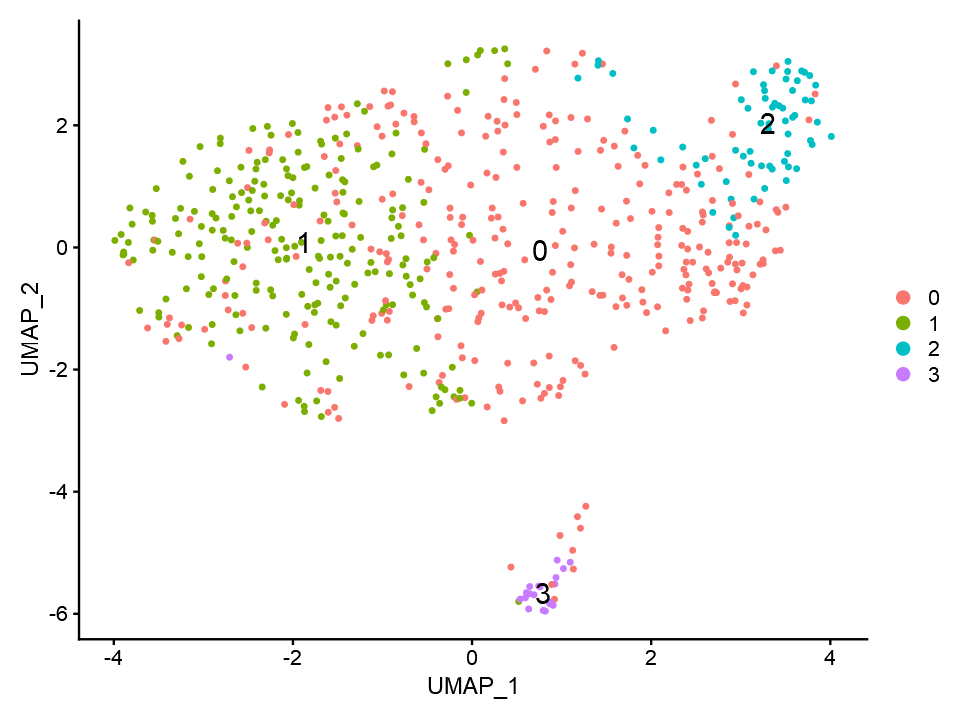

In [38]:
options(repr.plot.width=8, repr.plot.height=6)

DimPlot(Axolotl.integrated, reduction = "umap", pt.size = 0.9, label = T, label.size = 6)# + NoLegend()


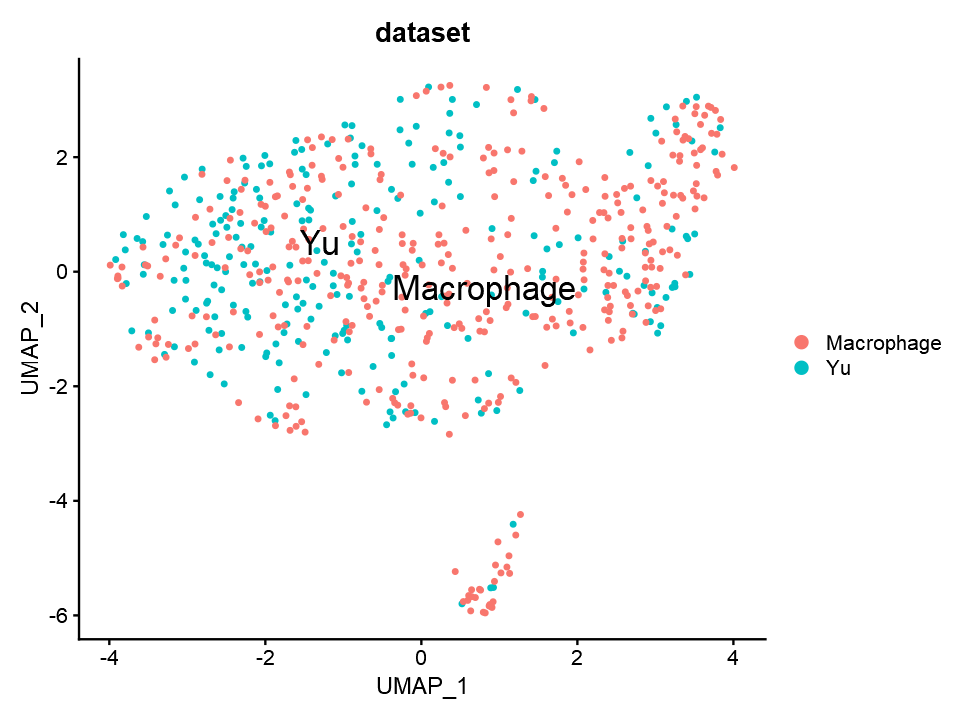

In [39]:
DimPlot(Axolotl.integrated, reduction = "umap", pt.size = 0.9, label = T, 
        label.size = 7, group.by = "dataset", repel = T)# + NoLegend()

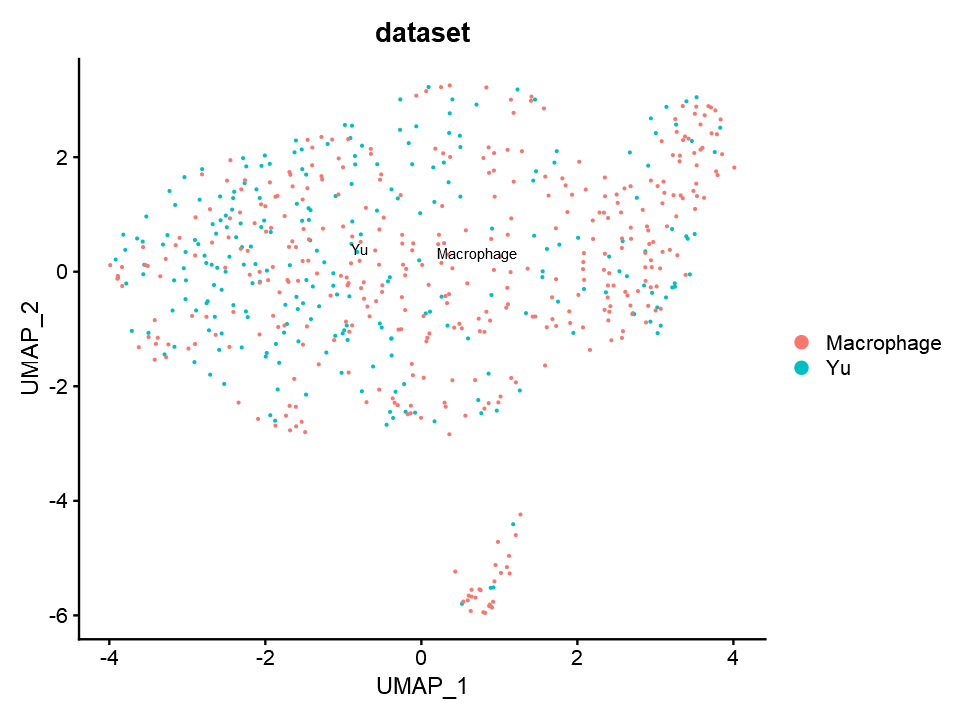

In [40]:
DimPlot(Axolotl.integrated, reduction = "umap", pt.size = 0.1, label = T, 
        label.size = 3, group.by = "dataset", repel = T) #+ NoLegend()

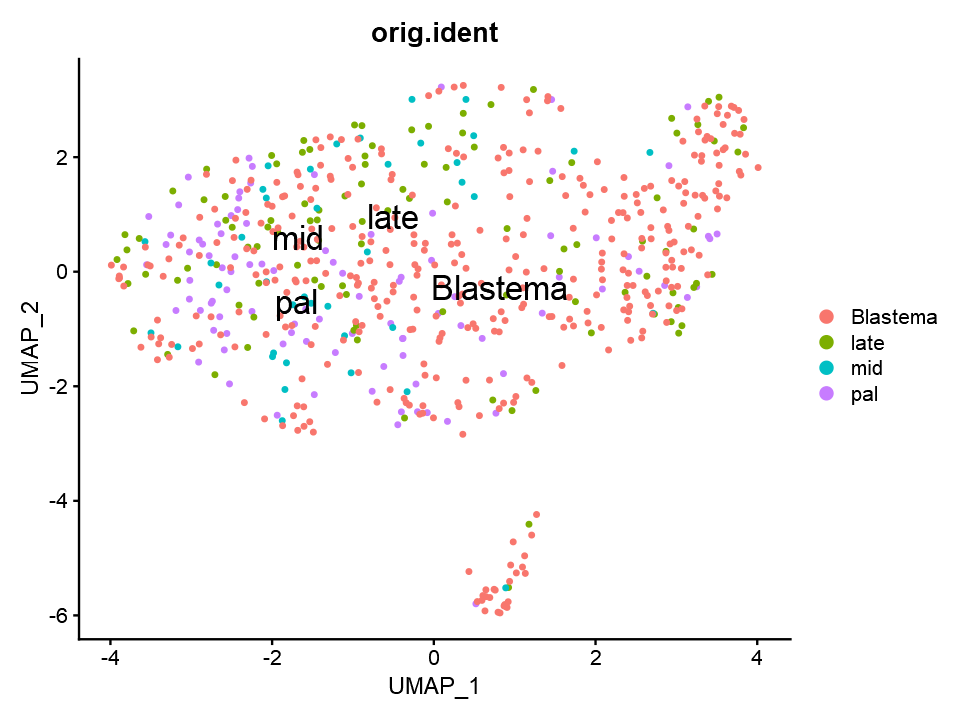

In [41]:
DimPlot(Axolotl.integrated, reduction = "umap", pt.size = 0.9, label = T, 
        label.size = 7, group.by = "orig.ident", repel = T) #+ NoLegend()

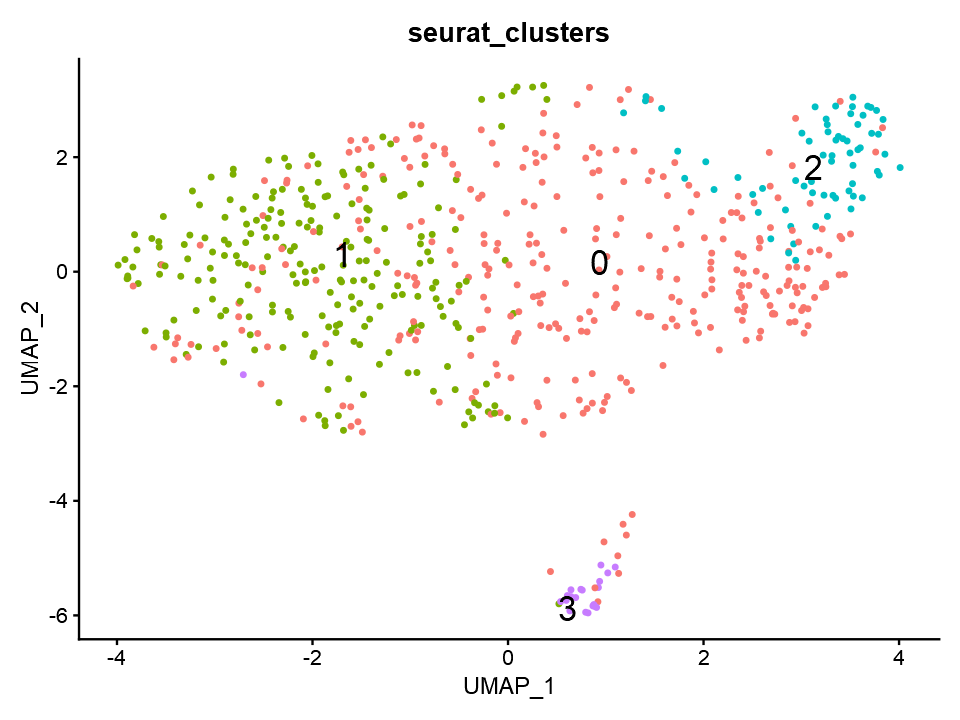

In [42]:
DimPlot(Axolotl.integrated, reduction = "umap", pt.size = 0.9, label = T, 
        label.size = 7, group.by = "seurat_clusters", repel = T) + NoLegend()

In [43]:
Axolotl.integrated

An object of class Seurat 
138559 features across 623 samples within 3 assays 
Active assay: integrated (4000 features, 4000 variable features)
 2 other assays present: RNA, SCT
 2 dimensional reductions calculated: pca, umap

In [44]:
saveRDS(Axolotl.integrated, file = "integrated_Macro_Blastema_Sen.rds")

In [45]:
# Set reticulate to use your preferred python version
reticulate::use_python("C:/Users/giovanni/anaconda3/envs/python39/python.exe")
reticulate::py_config()

python:         C:/Users/giovanni/anaconda3/envs/python39/python.exe
libpython:      C:/Users/giovanni/anaconda3/envs/python39/python39.dll
pythonhome:     C:/Users/giovanni/anaconda3/envs/python39
version:        3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Architecture:   64bit
numpy:          C:/Users/giovanni/anaconda3/envs/python39/Lib/site-packages/numpy
numpy_version:  1.20.3

python versions found: 
 C:/Users/giovanni/anaconda3/envs/python39/python.exe
 C:/Users/giovanni/anaconda3/python.exe
 C:/Users/giovanni/anaconda3/envs/4-rstudio/python.exe
 C:/Users/giovanni/anaconda3/envs/R-env/python.exe
 C:/Users/giovanni/anaconda3/envs/r4-base/python.exe
 C:/Users/giovanni/anaconda3/envs/spyder/python.exe

In [46]:
sceasy::convertFormat(Axolotl.integrated, from="seurat", to="anndata",
                       outFile='integrated_Macro_Blastema_Sen.h5ad')

AnnData object with n_obs × n_vars = 623 × 99218
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.1', 'seurat_clusters', 'dataset', 'cellType', 'integrated_snn_res.0.4'
    var: 'name'
    obsm: 'X_pca', 'X_umap'